In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# hightemp100 = pd.read_csv("../data/100_days_with_highest_temp.csv")
# avgdailytemp = pd.read_csv("../data/avg_daily_temp_curated.csv")
# avgmonthlytemp = pd.read_csv("../data/avg_monthly_temp_curated.csv")
# station_info = pd.read_csv("../data/station_info.csv")
# smhiprecip = pd.read_csv("../data/percipitation_data_curated.csv"
monthly = pd.read_pickle("../Dataframes/df_monthly_temp.pkl")

In [3]:
monthly

,Year,Month,Monthly avg
0,1944,1,2.03
1,1944,2,0.18
2,1944,3,0.96
3,1944,4,6.08
4,1944,5,10.74
...,...,...,...
953,2023,6,18.59
954,2023,7,16.78
955,2023,8,17.00
956,2023,9,17.02


In [4]:
x1 = monthly['Month']
y1 = monthly['Monthly avg']
z1 = np.polyfit(x1, y1, 2)
p1 = np.poly1d(z1)

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

([<matplotlib.axis.XTick at 0x1c1ca7be7a0>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'Maj'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sep'),
  Text(10, 0, 'Okt'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

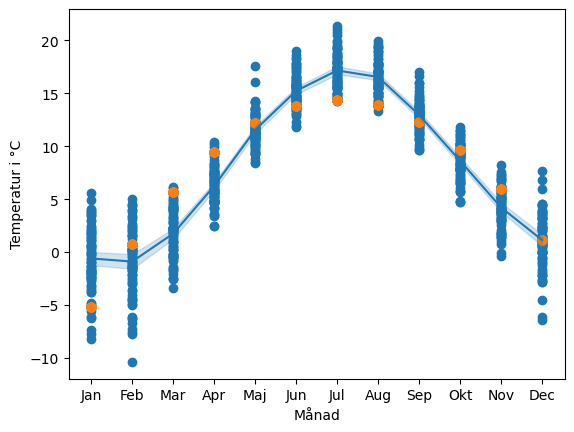

In [5]:
plt.scatter(x1, y1)
plt.scatter(x1, p1(x1))
sns.lineplot(x='Month', y= 'Monthly avg', data=monthly)
# plt.plot(x, p(x))
plt.xlabel('Månad')
plt.ylabel('Temperatur i °C')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['Jan', 'Feb', 'Mar', 'Apr', 'Maj', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec'])

- Varför är medeltemperaturen så låg i Juli jämfört med alla andra månader?

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


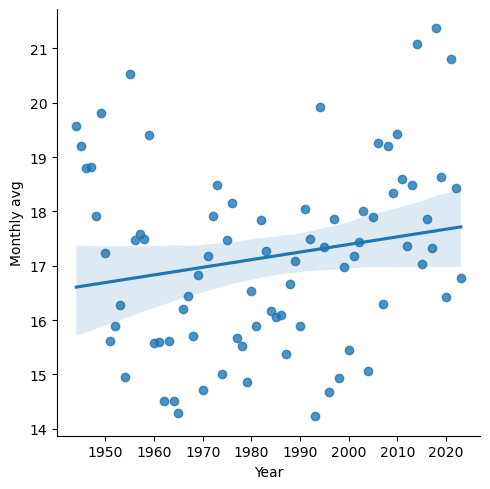

In [24]:
juli = monthly.query("Month == 7")
sns.lmplot(data=juli, x='Year', y='Monthly avg')

In [33]:
print(juli['Monthly avg'].min())
print()
print(juli['Monthly avg'].max())

14.23

21.37


# Vi ser klart och tydligt att Juli blir varmare med tiden
- Blir det även varmare över tid i December?

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


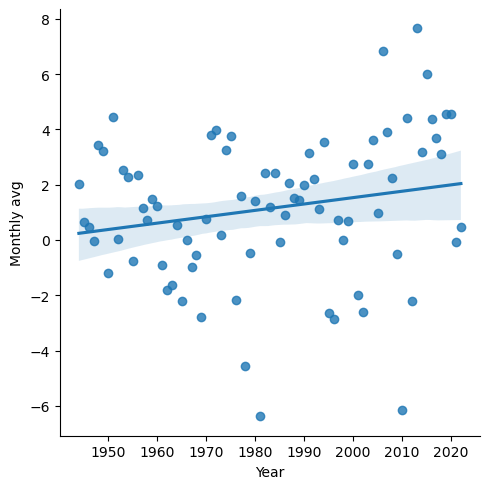

In [26]:
december = monthly.query("Month == 12")
sns.lmplot(data=december, x='Year', y='Monthly avg')

In [37]:
print(december['Monthly avg'].min())
print()
print(december['Monthly avg'].max())

-6.38

7.65


In [7]:
x = monthly['Month']
y = monthly['Monthly avg']

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

<Axes: xlabel='Year', ylabel='Monthly avg'>

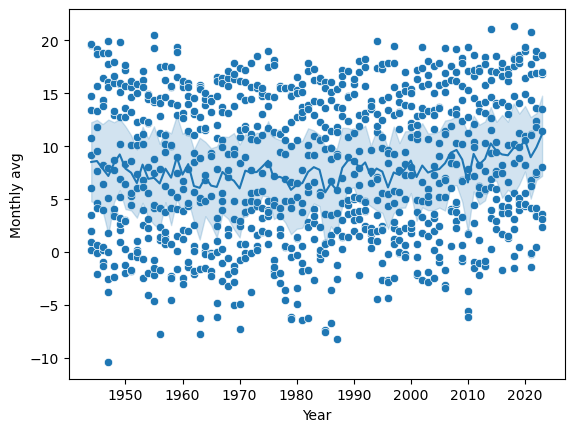

In [23]:
sns.scatterplot(x=monthly['Year'], y=monthly['Monthly avg'], data=monthly)
sns.lineplot(x=monthly['Year'], y=monthly['Monthly avg'], data=monthly)

c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Stenb\anaconda3\envs\AP_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

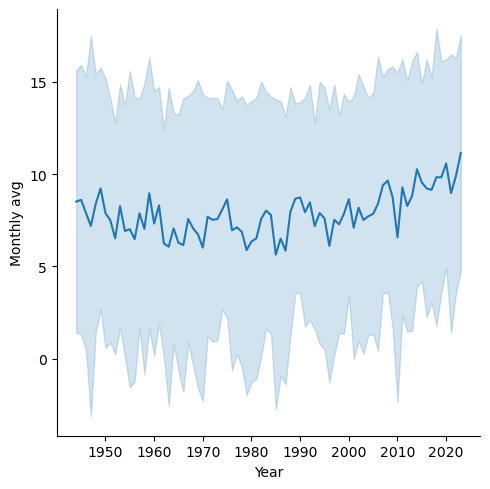

In [15]:
sns.relplot(x=monthly['Year'], y=monthly['Monthly avg'], data=monthly, kind='line')


<Axes: >

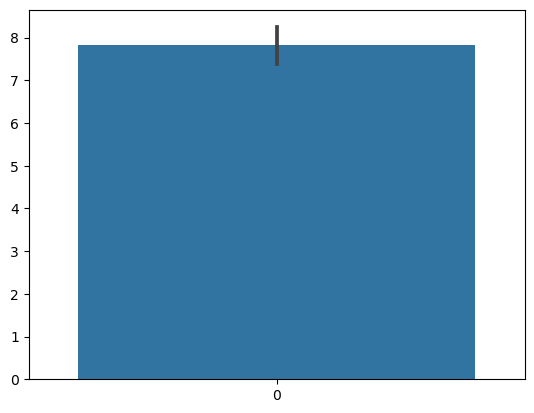

In [14]:
sns.barplot()